In [1]:
import xpsi
from xpsi.global_imports import _c, _G, _dpr, gravradius, _csq, _km, _2pi, _keV, _k_B, _h, _h_keV, _c_cgs
k_B_over_keV = _k_B / _keV
from scipy.integrate import quad

import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
from custom_tools import CustomInstrumentJ1808, CustomBackground_BlackBody, CustomBackground_DiskBB, CustomInterstellar, get_T_in_log10_Kelvin, plot_2D_pulse, get_mids_from_edges, CustomSignal, SynthesiseData
from matplotlib import cm

/=============================================\
| X-PSI: X-ray Pulse Simulation and Inference |
|---------------------------------------------|
|                Version: 2.0.0               |
|---------------------------------------------|
|      https://xpsi-group.github.io/xpsi      |
\=============================================/

Imported GetDist version: 1.4
Imported nestcheck version: 0.2.1


In [2]:
################################## INSTRUMENT #################################
channel_low = 10 # 20
channel_hi = 600 #600 #500 #300 commented numbers work
max_input = 2000 #2000 #1800 #1400

NICER103 = CustomInstrumentJ1808.from_response_files(ARF = '../model_data/instrument_data/J1808_NICER_103/ni2584010103mpu7_arf_aeff.txt',
                                                  RMF = '../model_data/instrument_data/J1808_NICER_103/ni2584010103mpu7_rmf_matrix.txt',
                                                  channel_edges = '../model_data/instrument_data/J1808_NICER_103/ni2584010103mpu7_rmf_energymap.txt',
                                                  channel_low=channel_low,
                                                  channel_hi=channel_hi,
                                                  max_input=max_input)

Setting channels for loaded instrument response (sub)matrix...
Channels set.
No parameters supplied... empty subspace created.


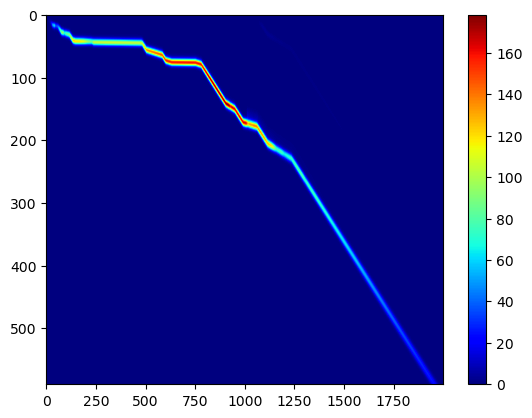

In [3]:
plt.imshow(NICER103.matrix, cmap='jet',aspect='auto')
plt.colorbar()


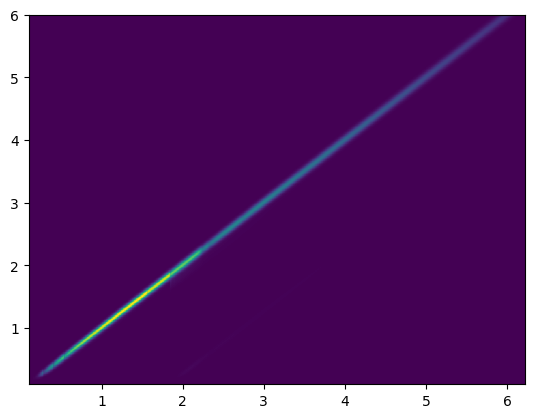

In [4]:
plt.pcolormesh(NICER103.energy_edges, NICER103.channel_edges, NICER103.matrix)

In [5]:
NICER2019 = CustomInstrumentJ1808.from_response_files(ARF = '../model_data/instrument_data/J1808_NICER_2019/merged_saxj1808_2019_arf_aeff.txt',
                                                  RMF = '../model_data/instrument_data/J1808_NICER_2019/merged_saxj1808_2019_rmf_matrix.txt',
                                                  channel_edges = '../model_data/instrument_data/J1808_NICER_2019/merged_saxj1808_2019_rmf_energymap.txt',
                                                  channel_low=channel_low,
                                                  channel_hi=channel_hi,
                                                  max_input=max_input)

Setting channels for loaded instrument response (sub)matrix...
Channels set.
No parameters supplied... empty subspace created.


In [6]:
# channel_low = 10

# NICER2019 = CustomInstrumentJ1808.from_response_files(ARF = '../model_data/J1808/saxj1808_2019_arf_aeff.txt',
#                                                   RMF = '../model_data/J1808/saxj1808_2019_rmf_matrix_padded.txt',
#                                                   channel_edges = '../model_data/J1808/saxj1808_2019_rmf_energymap.txt',
#                                                   channel_low=channel_low,
#                                                   channel_hi=channel_hi,
#                                                   max_input=max_input)

(800.0, 1200.0)

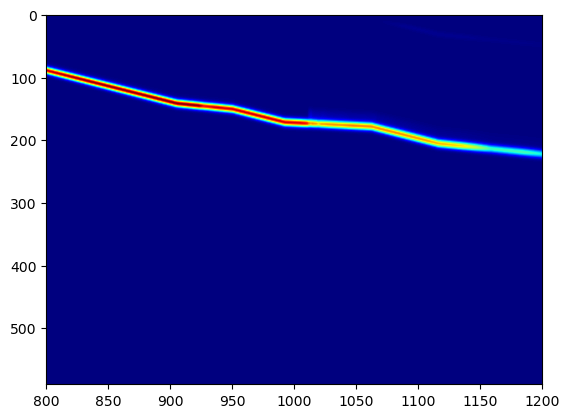

In [7]:
fig, ax = plt.subplots()

ax.imshow(NICER2019.matrix, cmap='jet', aspect='auto')
ax.set_xlim([800,1200])

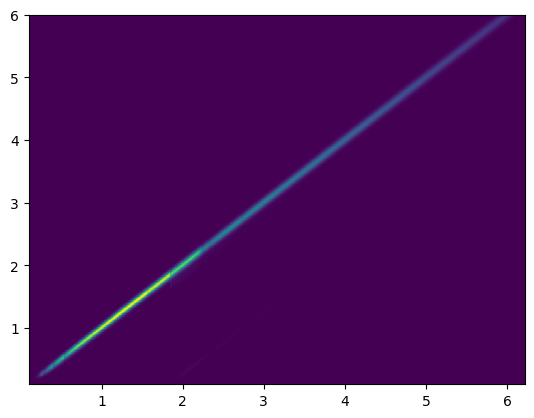

In [8]:
plt.pcolormesh(NICER2019.energy_edges, NICER2019.channel_edges, NICER2019.matrix)